In [10]:
import pandas as pd
import numpy as np
import sqlite3
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


conn = sqlite3.connect('moviedb')
df=pd.read_sql('select * from  basics b  join ratings r on b.tconst =r.tconst join principals p on p.tconst = b.tconst join name n on n.nconst=p.nconst', conn) 
df['main_genre'] = df['genres'].str.split(',').str[0] ## create a new column with just the main genre

Genre Popularity over time

In [ ]:
genredf=df[['startYear','main_genre']]
genredf['startYear'] = genredf['startYear'].replace(r'\N', np.nan)
genredf['startYear'] = pd.to_numeric(genredf['startYear'])




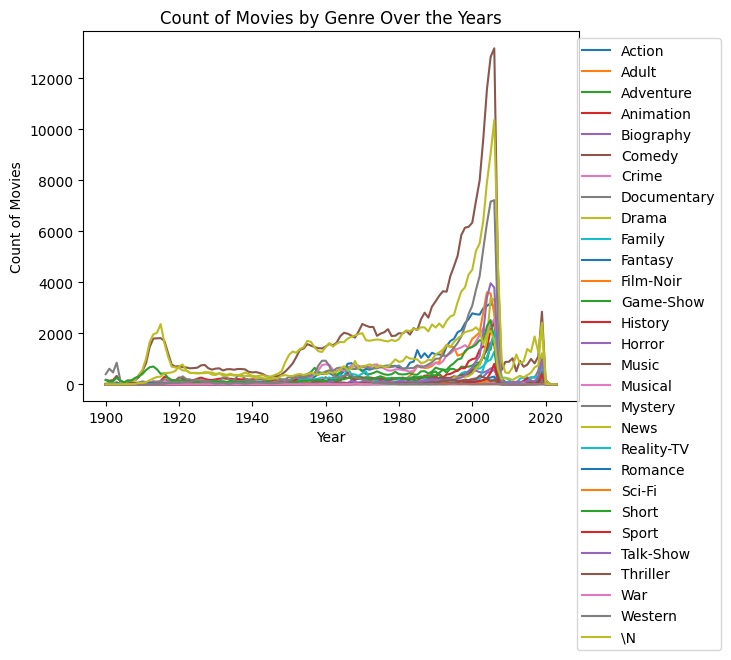

In [28]:



filtereddf = genredf[(genredf['startYear'] >= 1900) & (genredf['startYear'] <= 2024)]
genre_counts =filtereddf.groupby(['startYear', 'main_genre']).size().unstack(fill_value=0)
for genre in genre_counts.columns:
    plt.plot(genre_counts.index, genre_counts[genre], label=genre)


plt.xlabel('Year')
plt.ylabel('Count of Movies')
plt.title('Count of Movies by Genre Over the Years')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))


plt.show()

## I was very confused by this pattern but then I remembered there was another writers strike in 2007!

zooming in on covid time

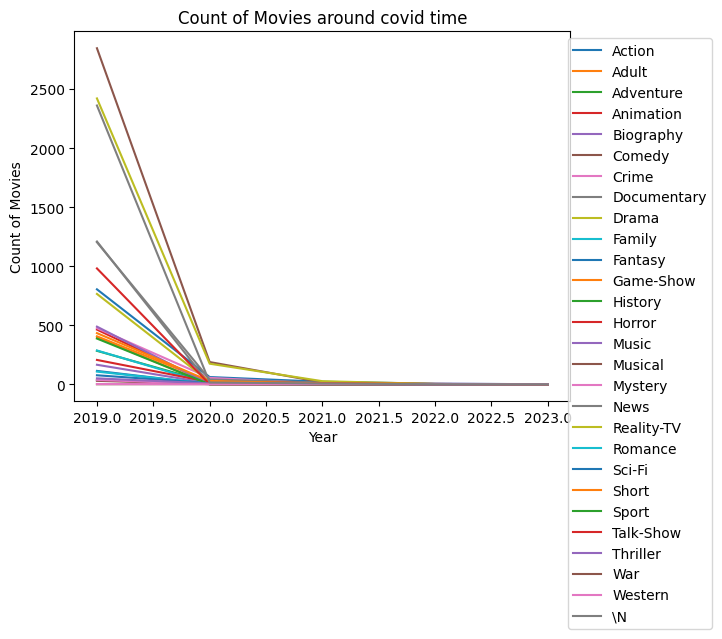

In [31]:
filtereddf = genredf[(genredf['startYear'] >= 2019) & (genredf['startYear'] <= 2024)]
genre_counts =filtereddf.groupby(['startYear', 'main_genre']).size().unstack(fill_value=0)
for genre in genre_counts.columns:
    plt.plot(genre_counts.index, genre_counts[genre], label=genre)


plt.xlabel('Year')
plt.ylabel('Count of Movies')
plt.title('Count of Movies around covid time')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))


plt.show()

Zooming in around 2008 depression

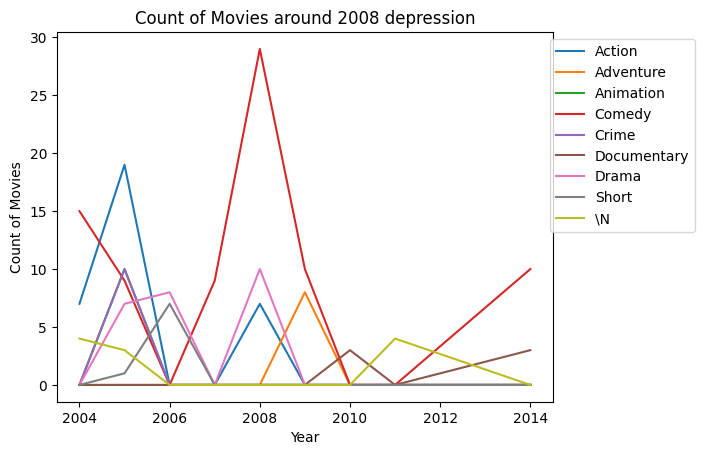

In [13]:
filtereddf = genredf[(genredf['startYear'] >= 2004) & (genredf['startYear'] <= 2014)]
genre_counts =filtereddf.groupby(['startYear', 'main_genre']).size().unstack(fill_value=0)
for genre in genre_counts.columns:
    plt.plot(genre_counts.index, genre_counts[genre], label=genre)


plt.xlabel('Year')
plt.ylabel('Count of Movies')
plt.title('Count of Movies around 2008 depression')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))


plt.show()  ## numbers may be low because of the 2007 strike

Other graphs

In [17]:
import pandas as pd
import numpy as np
import sqlite3
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


conn = sqlite3.connect('moviedb')

df=pd.read_sql('select startYear, runtimeMinutes, averageRating from  basics b join ratings r on b.tconst = r.tconst', conn) 
df['runtimeMinutes'] = df['runtimeMinutes'].replace(r'\N', np.nan)
df['startYear'] = df['startYear'].replace(r'\N', np.nan)
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'])
df['startYear'] = pd.to_numeric(df['startYear'])
## loads and cleans data

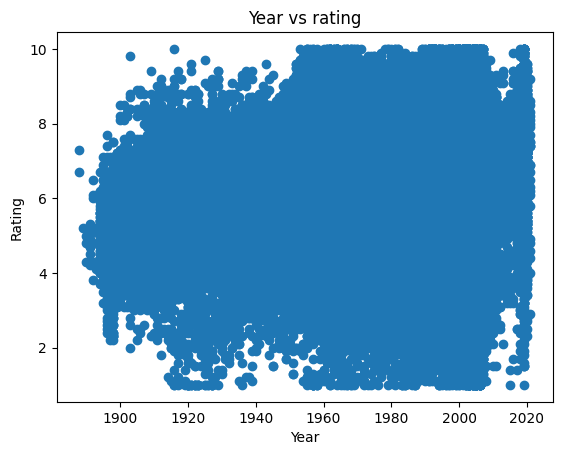

In [6]:
plt.scatter(df['startYear'], df['averageRating'])
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Year vs rating')
plt.show()

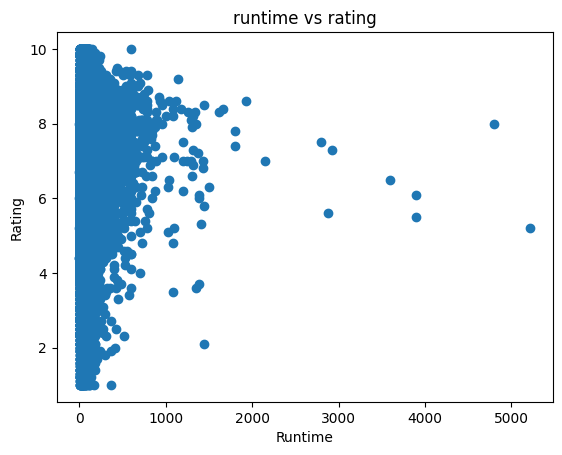

In [7]:
plt.scatter(df['runtimeMinutes'], df['averageRating'])
plt.xlabel('Runtime')
plt.ylabel('Rating')
plt.title('runtime vs rating')
plt.show()

Text(0.5, 1.0, 'Scatter Plot of Runtime vs Year')

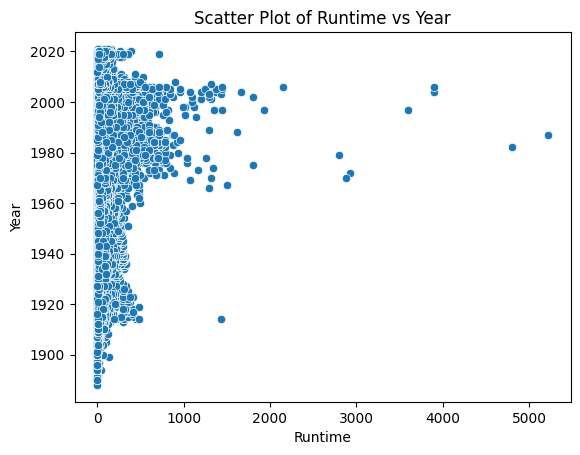

In [8]:
sns.scatterplot(x=df['runtimeMinutes'], y=df['startYear'])

# Customize labels and title
plt.xlabel('Runtime')
plt.ylabel('Year')
plt.title('Scatter Plot of Runtime vs Year')


<Axes: xlabel='startYear', ylabel='averageRating'>

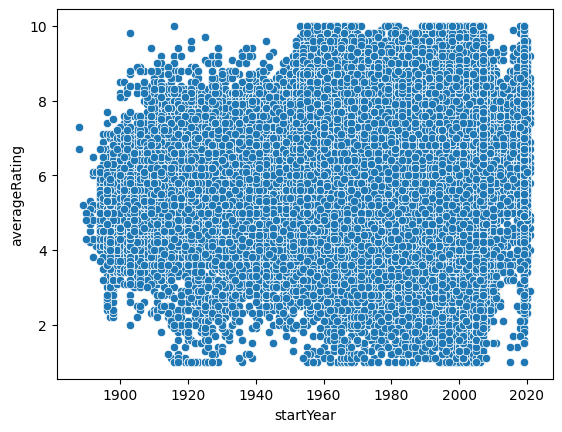

In [18]:
sns.scatterplot(x=df['startYear'], y=df['averageRating'])